In [ ]:
# colab에서 한글이 깨질때 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# EDA 목표
*   유니콘 기업 분류 및 예비 유니콘 기업 분류
*   데이터 관계를 통해 가설 설립





In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
company_df = pd.read_csv('/content/MyDrive/MyDrive/company_nps_data.csv', encoding="cp949")

In [4]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [16]:
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [15]:
company_df['년도'].sort_values()

50120    2015
61242    2015
61226    2015
39082    2015
90227    2015
         ... 
75986    2019
17795    2019
78226    2019
20316    2019
7408     2019
Name: 년도, Length: 99801, dtype: int64

In [6]:
print(company_df.shape) # 데이터의 행, 열 개수 출력
print(company_df.dtypes) # 데이터의 타입 출력

(99801, 6)
회사ID        int64
연매출액        int64
년도          int64
월           int64
월별_연금보험료    int64
월별_직원수      int64
dtype: object


In [7]:
company_df[company_df.duplicated(keep=False)] # 중복된 열 출력 --> 없음

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수


In [8]:
company_df.isna().sum() # 컬럼별 NaN값 출력 --> NaN값 없음

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [9]:
company_df.describe() # 컬럼별 요약 통계 지표 출력

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [10]:
company_df.corr() # 회사 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,1.000000,-0.001675,-0.033194,0.008969,-0.010393,0.007430
연매출액,-0.001675,1.000000,0.015202,-0.001347,0.729694,0.638125
년도,-0.033194,0.015202,1.000000,-0.096107,0.008121,-0.002206
월,0.008969,-0.001347,-0.096107,1.000000,0.005006,0.002000
월별_연금보험료,-0.010393,0.729694,0.008121,0.005006,1.000000,0.962101
월별_직원수,0.007430,0.638125,-0.002206,0.002000,0.962101,1.000000


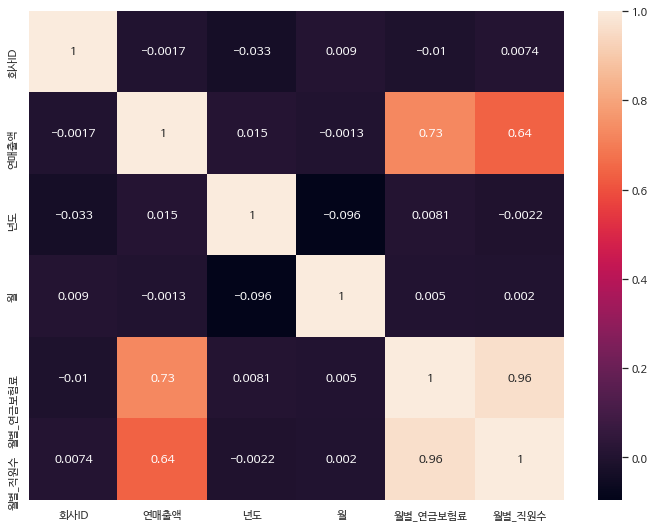

In [11]:
sns.heatmap(company_df.corr(), annot=True)
# 연매출액과 연금보험료, 월별 직원수 상관관계임

#개인적인 전처리 방향


1. 연매출액이 1조 이상 유니콘기업과 1000억이상 예비유니콘분류
2. 3년 평균 20%이상 성장율인 기업 분류
3. 직원수 기준을 통해 분류






